In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
df = pd.read_csv('Diabetes_prediction.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0
...,...,...,...,...,...,...,...,...,...
995,1,103.496355,41.059401,24.930299,43.675978,25.846062,0.455884,19.905419,0
996,1,60.714150,64.082842,24.689064,111.562745,19.464280,0.250560,44.421874,1
997,0,97.597727,64.122312,22.140339,108.138552,22.733052,0.761463,58.949800,1
998,0,66.775137,55.908797,24.885274,219.521484,31.819187,0.382877,46.928923,0


In [ ]:
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

In [ ]:
print(x)

[[56.41073075 24.33673596]
 [70.61551995 23.44359117]
 [63.26261803 23.40436426]
 ...
 [64.12231166 22.14033912]
 [55.90879746 24.88527409]
 [69.11159275 25.62126623]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=0)

In [ ]:
len(x)

1000

In [ ]:
len(X_train)

500

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)
print(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Accuracy',metrics.accuracy_score(y_test, y_pred))

Accuracy 0.626


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[280  64]
 [123  33]]


<ipython-input-54-e859566d5090>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


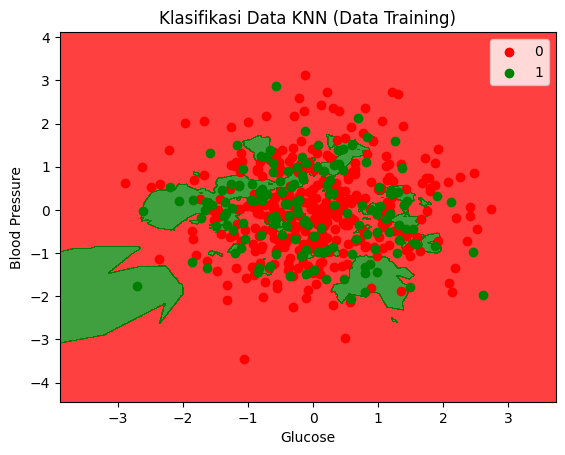

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data KNN (Data Training)')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()

<ipython-input-49-2c33a6044a80>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


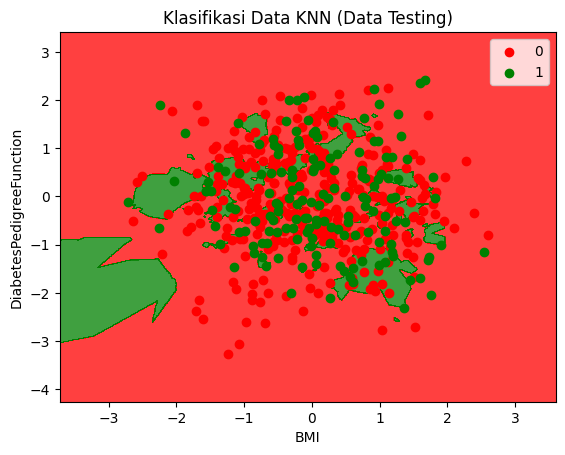

In [ ]:
X_set, y_set = X_test, y_test
x1, x2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data KNN (Data Testing)')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()